# **Multiple Linear Regression**

---

###Data

The data used in this assignment contains a cleaned and curated version of the market real estate valuations collected from Sindian Dist., New Taipei City, Taiwan, by Prof. I-Cheng Yeh, Department of Civil Engineering, Tamkang University, Taiwan.

The features in the data are the following:

* ```transaction_date```: the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
* ```house_age```: the house age (unit: year)
* ```distance_nearest_MRT_station```: the distance to the nearest MRT station (unit: meter)
* ```convenience_stores```: the number of convenience stores in the living circle on foot (integer)

The target is:
* ```house_price_unit_area```house price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared)

---

## HW instructions:

Similar to what was done in class, your task is to do the following:
1.   create a simple regression model that utilizes only one feature: the log10 of ```distance_nearest_MRT_station``` to predict the house price/unit area, and find the model's metrics ($R^2$ and Adjusted-$R^2$), as well as the the coeffient (slope) of the line.

2.   create a multiple regression model that utilizes all features in the dataset to predict the house price/unit area, and find the model's metrics ($R^2$ and Adjusted-$R^2$), as well as the the coeffient for each variable.

--

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt

Read the data file from the class repo which can be found in the folder "data" and is called "Real_estate.csv"

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/fedhere/FDSFE_FBianco/main/data/Real_estate.csv")


## Task 1: simple linear regression

create a simple regression model that utilizes only one feature: the log10 of ```distance_nearest_MRT_station``` to predict the house price/unit area, and find the model's metrics ($R^2$ and Adjusted-$R^2$), as well as the the coeffient (slope) of the line.

---


Calculate the log10 of the ```distance_nearest_MRT_station``` column and add it as a new column to the data frame

In [ ]:
df['log_distance_nearest_MRT_station'] = np.log10(df['distance_nearest_MRT_station'])


Standardize your feature and target data (setting their mean to 0 and standard deviation to 1)

In [ ]:
scaler = StandardScaler()
df[['log_distance_nearest_MRT_station', 'house_price_unit_area']] = scaler.fit_transform(df[['log_distance_nearest_MRT_station', 'house_price_unit_area']])


Using the code library of your choice, fit a linear regression model to the data

In [ ]:
X = df["log_distance_nearest_MRT_station"].values.reshape(-1, 1)
y = df['house_price_unit_area']
linreg = LinearRegression()
linreg.fit(X, y)
print("Intercept:", linreg.intercept_)


Intercept: 2.530876008653598e-17


Print both the $R^2$ and Adjusted-$R^2$ of this model

(+1 bonus point for using the `.format()` method in `print` to show the two values and round them to 3 decimal places)

In [ ]:
r2 = linreg.score(X, y)
print("r2 = {:.3f}".format(r2))

n = len(y)
k = 1
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)
print("adjusted-r2 = {:.3f}".format(adjusted_r2))

r2 = 0.539
adjusted-r2 = 0.538


TARA - You can get the r-squared from sklearn.
from sklearn.metrics import r2_score
adjusted_r_squared = r2_score(y_true, y_pred, adjusted=True)

Print the coefficient (slope) of the line

In [ ]:
coefficient = linreg.coef_[0]
print("Coefficient (slope) = {:.3f}".format(coefficient))


Coefficient (slope) = -0.734


*From* looking at the coefficient, what can you say about the relationship between the feature (the distance to the nearest MRT station) and the target (the house price/unit area)?

**properties located closer to the MRT station tend to have higher unit prices, while properties located farther away have lower unit prices.**

Plot the actual vs. model predicted values for the house price/unit area for all log10(distance to MRT station) values in the data

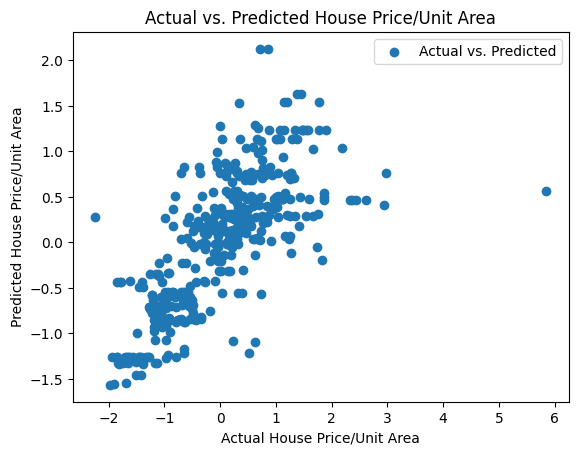

In [ ]:
import matplotlib.pyplot as plt
predicted_values = linreg.predict(X)

# Create a scatter plot of the actual vs. predicted values
plt.scatter(y, predicted_values, label='Actual vs. Predicted', marker='o')
plt.xlabel('Actual House Price/Unit Area')
plt.ylabel('Predicted House Price/Unit Area')
plt.legend()
plt.title('Actual vs. Predicted House Price/Unit Area')
plt.show()


## Task 2: multiple linear regression (all variables)

create a multiple regression model that utilizes all features to predict the house price/unit area, and find the model's metrics ($R^2$ and Adjusted-$R^2$), as well as the the coeffient for each variable.

---

a univariate linear regression model looks like $y = a_0 + a_1 x$

a multivariate linear regression model with 3 exogenous variable looks like $y = a_0 + a_1 x_1 + a_2 x_2 + a_3 x_3$

The easiest way to implement it is to use `statsmodels.formula.api` which allows to write out the formula you want to use for the regression in more or less plain English. We did it in the linear regression notebook https://github.com/fedhere/FDSFE_FBianco/blob/main/HW5/linear_regression_in_detail.ipynb

The univariate linear model we built in that notebook was

```
import statsmodels.formula.api as smf
     
mod = smf.ols(formula='wspeed ~ population', data=df)
res = mod.fit()
res.summary()
```

y = ax + b => `formula='wspeed ~ population'`

The intercept (b) is implied in the use of `~`
`x` in this case was population and `y` wspeed

Your formula will look like
`formula='y ~ x1 + x2 + x3 + x4'` with the approproate feature names

Make sure all your features and target columns are standardized, and that you are using all the features in the data frame (also make sure to use ```log10(distance_nearest_MRT_station)``` rather than ```distance_nearest_MRT_station``` as a feature)

In [ ]:
formula = 'house_price_unit_area ~ log_distance_nearest_MRT_station + house_age + convenience_stores + transaction_date'

In [ ]:
scaler = StandardScaler()

X = df[['house_age', 'log_distance_nearest_MRT_station', 'convenience_stores', 'transaction_date']]
y = df['house_price_unit_area']

X = scaler.fit_transform(X)
y = scaler.fit_transform(y.values.reshape(-1, 1))

Using the code library of your choice, fit a multiple linear regression model to the data

In [ ]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     154.2
Date:                Tue, 17 Oct 2023   Prob (F-statistic):           2.72e-80
Time:                        16:52:32   Log-Likelihood:                -397.12
No. Observations:                 414   AIC:                             804.2
Df Residuals:                     409   BIC:                             824.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.634e-14      0.031   -1.8e-12      1.0

Print the coefficients of each of the features

In [ ]:
coefficients = model.params[1:]
print("Coefficients:")
for feature, coefficient in zip(df.columns[1:-1], coefficients):  # Exclude the target variable and constant
    print(f"{feature}: {coefficient:.3f}")



Coefficients:
house_age: -0.177
distance_nearest_MRT_station: -0.643
convenience_stores: 0.137
house_price_unit_area: 0.152


What can you claim about the relative correlation and influence of each feature on the prediction of the target variable?

**log_dist_MRT appears to have the most significant influence on predicting house_price_unit_area, with a strong negative correlation. Convenience_stores and transaction_date have positive correlations with house prices but relatively weaker influences. House_age has a negative correlation with house prices, but its influence is weaker as well.**

Print the $R^2$ of this model

In [ ]:
r2 = model.rsquared
print(f"r2 = {r2:.3f}")

r2 = 0.601


Looking only at the $R^2$ scores for this model relative to the previous model in Task 1, would you say the model has improved with the addition of the remaining features or not? and Why?

**A higher R^2 indicates that the multiple linear regression model in Task 2 explains a larger proportion of the variance in the target variable (house price/unit area) compared to the simple linear regression model in Task 1. Therefore, it can be concluded that the model in Task 2 with multiple features is an improvement over the model in Task 1, as it provides a better fit to the data and explains more of the variation in the target variable.**

Print the Adjusted-$R^2$ of this model

In [ ]:

adjusted_r2 = model.rsquared_adj
print(f"adjusted-r2 = {adjusted_r2:.3f}")

adjusted-r2 = 0.597


Looking at both $R^2$ and Ajusted-$R^2$ scores for this model relative to the previous model in Task 1, would you say the model has improved with the addition of the remaining features or not? and Why?

***task 2 model is still improved***

TARA - You did not include why the adjusted r-squared made the model better.

Plot the actual vs. model predicted values for the house price/unit area for all objects in the data. Is there any visible improvement in the quality of the prediction that you can claim from comparing this plot with the one from Task 2?

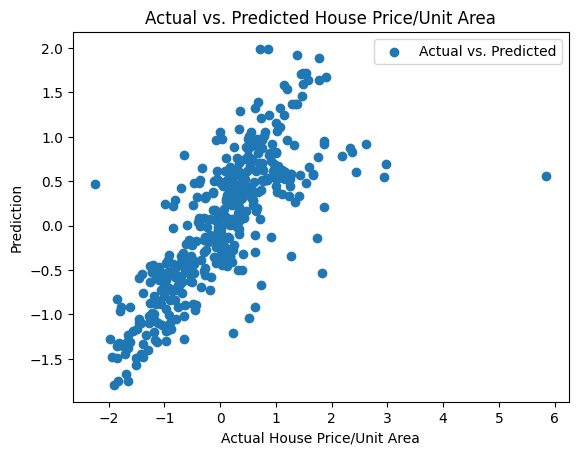

In [ ]:
import matplotlib.pyplot as plt

# Get the actual and predicted values
actual_values = df['house_price_unit_area']
predicted_values = model.predict()

# Create a scatter plot
plt.scatter(actual_values, predicted_values, label='Actual vs. Predicted', marker='o')
plt.xlabel('Actual House Price/Unit Area')
plt.ylabel('Prediction')
plt.legend()
plt.title('Actual vs. Predicted House Price/Unit Area')
plt.show()



TARA - Missing Captions.

For your Github readme, make sure to include more specific information about the homework